In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=45,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='constant',
                                 cval=125
                                 
                                 )
validation_datagen=ImageDataGenerator(rescale=1./255
)
test_datagen=ImageDataGenerator(rescale=1./255
)

In [3]:
i = 0
import os
for batch in train_datagen.flow_from_directory(directory=r'F:\main_images_wavelet_binary\train\normal', 
                                         batch_size=16,  
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         save_to_dir=r'F:\augmented_main_images_wavelet_binary\train\normal', 
                                         save_prefix='aug', 
                                         save_format='png'):
    i += 1
    if i > 49:
        break 
k= 0
import os
for batch in train_datagen.flow_from_directory(directory=r'F:\main_images_wavelet_binary\train\PD', 
                                         batch_size=16,  
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         save_to_dir=r'F:\augmented_main_images_wavelet_binary\train\PD', 
                                         save_prefix='aug', 
                                         save_format='png'):
    k += 1
    if k > 64:
        break 

Found 102 images belonging to 1 classes.
Found 80 images belonging to 1 classes.


In [4]:
import glob
import os

In [5]:
size=224

train_images=[]
train_labels=[]

for directory_path in glob.glob("F:/augmented_main_images_wavelet_binary/train/*"):
    label=directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)


train_images=np.array(train_images)
train_labels=np.array(train_labels)

test_images=[]
test_labels=[]

for directory_path in glob.glob("F:/main_images_wavelet_binary/val/*"):
    fruit_label=directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

test_images=np.array(test_images)
test_labels=np.array(test_labels)

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)


x_train,y_train,x_test,y_test=train_images,train_labels_encoded,test_images,test_labels_encoded

x_train,x_test=x_train/255.0,x_test/255.0


In [7]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [8]:
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16

In [9]:
VGG_model=VGG16(weights='imagenet',include_top=False,input_shape=(size,size,3))

for layer in VGG_model.layers:
    layer.trainable=False

feature_extractor=VGG_model.predict(x_train)
features=feature_extractor.reshape(feature_extractor.shape[0],-1)


X=features






In [10]:
X_test_feature=VGG_model.predict(x_test)
X_test_features=X_test_feature.reshape(X_test_feature.shape[0],-1)


In [11]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100,random_state=42)

RF.fit(X,y_train)

RandomForestClassifier(random_state=42)

In [12]:
X_test_feature=VGG_model.predict(x_test)
X_test_features=X_test_feature.reshape(X_test_feature.shape[0],-1)

prediction_RF=RF.predict(X_test_features)
prediction_RF=le.inverse_transform(prediction_RF)

from sklearn import metrics
print(print("testing_accuracy: %.2f%%" % (testing_accuracy*100)))

Accuracy=  0.8913043478260869


<AxesSubplot:>

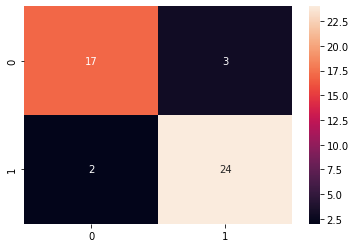

In [13]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(test_labels,prediction_RF)
sns.heatmap(cm1,annot=True)

In [14]:
from sklearn.svm import SVC
SF=SVC(kernel='rbf',C=13)
SF.fit(X,y_train)

prediction_SF=SF.predict(X_test_features)
prediction_SF=le.inverse_transform(prediction_SF)

from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels,prediction_SF))

Accuracy=  0.9130434782608695


<AxesSubplot:>

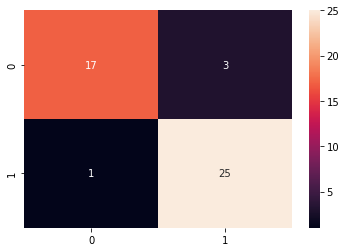

In [15]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(test_labels,prediction_SF)
sns.heatmap(cm1,annot=True)

In [16]:
from sklearn.linear_model import LogisticRegression
LF=LogisticRegression()
LF.fit(X,y_train)

prediction_LF=LF.predict(X_test_features)
prediction_LF=le.inverse_transform(prediction_LF)

from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels,prediction_LF))

Accuracy=  0.8478260869565217


c:\users\debu\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

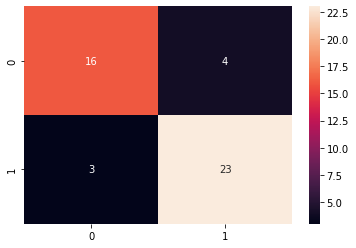

In [17]:
cm2=confusion_matrix(test_labels,prediction_LF)
sns.heatmap(cm2,annot=True)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2,weights='uniform',algorithm='brute',metric='minkowski')
knn.fit(X,y_train)
prediction_knn=knn.predict(X_test_features)
prediction_knn=le.inverse_transform(prediction_knn)
from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels,prediction_knn))

Accuracy=  0.8043478260869565


In [19]:
LF.score(X_test_features,y_test)

0.8478260869565217

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=300,random_state=42)

RF.fit(X,y_train)

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=200,random_state=42)

RF.fit(X,y_train)

prediction_RF=RF
prediction_RF=RF.predict(X_test_features)
prediction_RF=le.inverse_transform(prediction_RF)

from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels,prediction_RF))

Accuracy=  0.8913043478260869
